In [ ]:
#!sudo apt-get install python3.10  # Replace x with the desired version (e.g., 3.9)
#!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
#!sudo update-alternatives --config python3
#!sudo apt install python3-pip


'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
!pip install scikit-learn==1.5.2

In [25]:
!pip install xgboost tensorflow scikeras

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import ParameterGrid

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [27]:
df=pd.read_csv( "data/donnees_preprocesse_pour_modelisation.csv", sep=",")

#df=pd.read_csv( "/content/donnees_preprocesse_pour_modelisation.csv", sep=",")

In [28]:
data=df.copy()

- On veut modéliser la hauteur moyenne des vagues hautes 1h à l'avance donc à T+1 pour St Nazaré
- On va enlever les données non nécessaires du data set les lag allant de 2 à 23 (pour éviter que ça soit redondant)
- Ajouter lag 1 pour la variable hauteur moyenne des vagues hautes pour les autres balises
- Pour avoir la variable cible il faut shifter cette dernière

In [29]:
data.head()

,Temps moyen entre les vagues,Direction moyenne des vagues,Période des vagues énergétiques,Hauteur moyenne des vagues les plus hautes,temps_moyen_entre_les_vagues_2016_2017_1129,direction_moyene_des_vagues_2016_2017_1129,temps_moyen_entre_les_vagues_energetiques_2016_2017_1129,hauteur_moyenne_du_tier_des_vagues_les_plus_hautes_2016_2017_1129,temps_moyen_entre_les_vagues_2016_2017_1118,direction_moyene_des_vagues_2016_2017_1118,...,temps_moyen_entre_les_vagues_2016_2017_1119_rolling_mean_3,direction_moyene_des_vagues_2016_2017_1119_rolling_mean_3,temps_moyen_entre_les_vagues_energetiques_2016_2017_1119_rolling_mean_3,hauteur_moyenne_du_tier_des_vagues_les_plus_hautes_2016_2017_1119_rolling_mean_3,Hauteur moyenne des vagues les plus hautes_rolling_mean_24h,hour,hour_sin,hour_cos,month,périodes_hautes
0,10.277721,0.334779,14.730517,3.490737,10.861396,0.424323,14.690897,4.170059,10.749910,0.426009,...,11.094116,0.468768,14.747442,4.563504,3.089948,23,-0.258819,0.965926,1,1
1,10.254212,0.335589,14.743447,3.501528,10.844849,0.426131,14.710769,4.184670,10.738215,0.427954,...,11.092741,0.471357,14.773537,4.591006,3.128288,0,0.000000,1.000000,1,1
2,10.228110,0.336257,14.753474,3.509845,10.825637,0.427837,14.728780,4.196269,10.723679,0.429793,...,11.085865,0.473802,14.796691,4.611656,3.165590,1,0.258819,0.965926,1,1
3,10.199312,0.336771,14.760477,3.515597,10.803640,0.429431,14.744819,4.204734,10.706166,0.431511,...,11.074716,0.476142,14.817460,4.627014,3.201486,2,0.500000,0.866025,1,1
4,10.168637,0.337242,14.765240,3.519368,10.779817,0.431023,14.759665,4.210864,10.686752,0.433232,...,11.061068,0.478441,14.836705,4.639267,3.235521,3,0.707107,0.707107,1,1


In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temps moyen entre les vagues,17520.0,6.980914e+00,1.952070,3.007394,5.339015,6.747482e+00,8.342776,12.794645
Direction moyenne des vagues,17520.0,3.837060e-01,0.325757,-0.962609,0.242855,4.594650e-01,0.616232,0.940346
Période des vagues énergétiques,17520.0,1.110106e+01,2.158324,4.502103,9.388331,1.114581e+01,12.771287,17.357317
Hauteur moyenne des vagues les plus hautes,17520.0,1.313672e+00,0.657694,0.326232,0.881990,1.126670e+00,1.586927,4.445147
temps_moyen_entre_les_vagues_2016_2017_1129,17520.0,7.222848e+00,1.947209,3.298572,5.577801,6.985030e+00,8.614233,13.137815
direction_moyene_des_vagues_2016_2017_1129,17520.0,4.530657e-01,0.314253,-0.948593,0.334070,5.279404e-01,0.674009,0.993520
temps_moyen_entre_les_vagues_energetiques_2016_2017_1129,17520.0,1.115778e+01,2.145263,4.646813,9.496245,1.122393e+01,12.794791,17.253552
hauteur_moyenne_du_tier_des_vagues_les_plus_hautes_2016_2017_1129,17520.0,1.576659e+00,0.758428,0.396054,1.067557,1.371874e+00,1.901295,5.366242
temps_moyen_entre_les_vagues_2016_2017_1118,17520.0,7.127948e+00,1.906706,3.154718,5.537114,6.878787e+00,8.479745,13.005015
direction_moyene_des_vagues_2016_2017_1118,17520.0,4.650793e-01,0.330678,-0.984702,0.339000,5.466713e-01,0.700481,1.011016


### Modélisation

### J'ai enlevé hour month et season

In [31]:
# Trier les données par index temporel
series_data = data.sort_index()

# Séparer les features et la target
features = series_data.drop(columns=["target","hour","month"])
target = series_data["target"]

# LSTM

In [51]:
series_data = data.sort_index()

# Séparation des données temporelles (70% train, 15% validation, 15% test)
train_size = int(len(series_data) * 0.7)
val_size = int(len(series_data) * 0.15)
test_size = len(series_data) - train_size - val_size

data_train = series_data.iloc[:train_size]
data_val = series_data.iloc[train_size:train_size + val_size]
data_test = series_data.iloc[train_size + val_size:]

# Normalisation des features
scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_val_scaled = scaler.transform(data_val)
data_test_scaled = scaler.transform(data_test)

In [52]:
# Fonction pour créer les séquences pour LSTM
def create_sequences(data, target_column, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, target_column])
    return np.array(X), np.array(y)

In [53]:
# Définition de la colonne cible
target_column = series_data.columns.get_loc('target')

In [54]:
WINDOW_SIZE = 6

X_train, y_train = create_sequences(data_train_scaled, target_column, WINDOW_SIZE)
X_val, y_val = create_sequences(data_val_scaled, target_column, WINDOW_SIZE)
X_test, y_test = create_sequences(data_test_scaled, target_column, WINDOW_SIZE)

# Vérification des splits
print(f"Train: {len(X_train)} observations")
print(f"Validation: {len(X_val)} observations")
print(f"Test: {len(X_test)} observations")

Train: 12257 observations
Validation: 2621 observations
Test: 2623 observations


In [85]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf

HORIZON = 1

def build_lstm_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(WINDOW_SIZE, X_train.shape[2])),  # window_size=6
        Dropout(dropout_rate),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(HORIZON, activation='relu')  # Forecast horizon = 1
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model


In [86]:
# Build and train the baseline model
baseline_model = build_lstm_model()
history = baseline_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)


Epoch 1/50


c:\Users\vongu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0098 - mae: 0.0641 - val_loss: 2.5722e-04 - val_mae: 0.0128
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0014 - mae: 0.0271 - val_loss: 1.3872e-04 - val_mae: 0.0099
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0010 - mae: 0.0230 - val_loss: 9.1735e-05 - val_mae: 0.0078
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 7.8357e-04 - mae: 0.0200 - val_loss: 1.2593e-04 - val_mae: 0.0099
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 6.7299e-04 - mae: 0.0185 - val_loss: 6.3170e-04 - val_mae: 0.0241
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 6.2833e-04 - mae: 0.0178 - val_loss: 5.2317e-04 - val_mae: 0.0213
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 5.5838e-04 - mae: 0.0168 - val_loss: 1.1877e-04 - val_mae: 0.0092
Epoch 8/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 4.1730e-04 - mae: 0.0143 - val_loss: 4.3878e-04 - val_mae: 0.0202


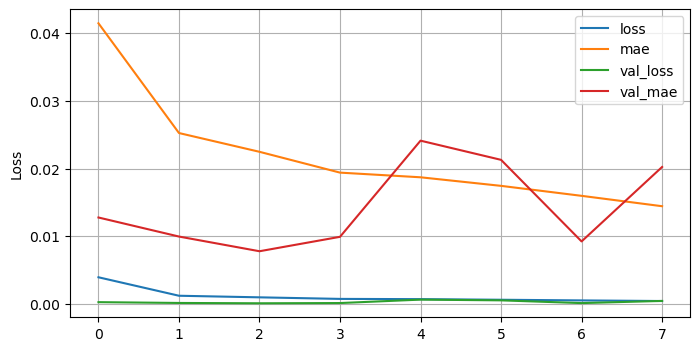

In [87]:
pd.DataFrame(history.history).plot(figsize=(8, 4))
plt.grid(True)
plt.ylabel('Loss')
plt.show()

In [88]:
y_pred_test = baseline_model.predict(X_test).flatten()

df_results = pd.DataFrame({
    'prediction': y_pred_test,
    'actual': y_test
})

df_results.head(10)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


,prediction,actual
0,0.171655,0.154823
1,0.168653,0.152695
2,0.165636,0.150768
3,0.162683,0.149266
4,0.159819,0.148211
5,0.157001,0.147153
6,0.154156,0.146034
7,0.151170,0.144962
8,0.147924,0.143882
9,0.144340,0.142796


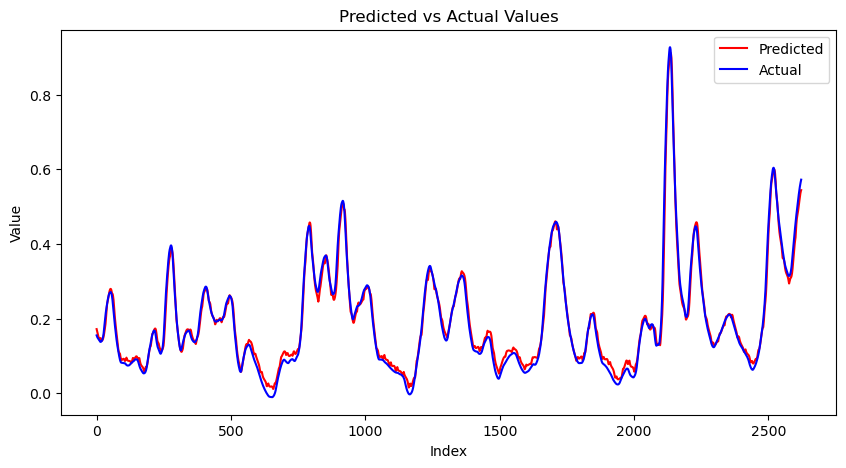

In [89]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(df_results.index, df_results['prediction'], label='Predicted', linestyle='solid', color='red')
plt.plot(df_results.index, df_results['actual'], label='Actual', linestyle='solid', color='blue')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


In [90]:
# Evaluate the baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
baseline_mae = mean_absolute_error(y_test, y_pred_test)

In [91]:
# Store baseline results
baseline_results = {
    "Baseline RMSE": baseline_rmse,
    "Baseline MAE": baseline_mae
}

baseline_results

{'Baseline RMSE': 0.016039104983264323, 'Baseline MAE': 0.01244194178009974}

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler

# Wrap the model
model = KerasRegressor(
    model=build_lstm_model,
    units=64,  # Default values (will be overridden by GridSearch)
    dropout_rate=0.2,
    learning_rate=0.001,
    epochs=10,
    batch_size=32,
    verbose=0
)

# Define the parameter grid
param_dist = {
    'model__units': [32, 64, 128],  # Prefix "model__" is required
    'model__learning_rate': [0.001, 0.0005]
}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_dist, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Save best model
best_LSTM = grid_result.best_estimator_

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

c:\Users\vongu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\vongu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
y_pred_test = best_LSTM.predict(X_test)

# Evaluate the fine tuned model
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
tuned_mae = mean_absolute_error(y_test, y_pred_test)

In [ ]:
print(f"📌 Base LSTM: MAE = {baseline_mae:.4f}, RMSE = {baseline_rmse:.4f}")
print(f"📌 Fine tuned LSTM: MAE = {tuned_mae:.4f}, RMSE = {tuned_rmse:.4f}")

📌 Base LSTM: MAE = 0.0047, RMSE = 0.0000
📌 Fine tuned LSTM: MAE = 0.0158, RMSE = 0.0177


On remarque que la performance n'améliore pas.